In [2]:
import pandas as pd

In [3]:
# Cargar datos
file_path = 'data2016.csv'
df = pd.read_csv(file_path, delimiter=',', encoding='utf-8')

In [4]:
df.head(5)

,periodo,estu_tipodocumento,estu_consecutivo,cole_area_ubicacion,cole_bilingue,cole_calendario,cole_caracter,cole_cod_dane_establecimiento,cole_cod_dane_sede,cole_cod_depto_ubicacion,...,fami_tienecomputador,fami_tieneinternet,fami_tienelavadora,desemp_ingles,punt_ingles,punt_matematicas,punt_sociales_ciudadanas,punt_c_naturales,punt_lectura_critica,punt_global
0,20162,TI,SB11201620480535,URBANO,NaN,A,ACADÉMICO,113001000259,113001000259,13,...,No,No,Si,A-,43.0,50.0,61,53,54,267
1,20162,TI,SB11201620118087,URBANO,NaN,A,TÉCNICO/ACADÉMICO,113001028421,113001028421,13,...,No,No,No,A1,49.0,58.0,60,48,66,287
2,20162,CC,SB11201620039668,URBANO,N,A,TÉCNICO/ACADÉMICO,168001000444,168001000444,68,...,Si,Si,No,A-,47.0,36.0,36,42,47,204
3,20162,TI,SB11201620128404,URBANO,N,A,TÉCNICO/ACADÉMICO,120011001047,120011001047,20,...,Si,Si,Si,A-,48.0,41.0,46,43,45,221
4,20162,TI,SB11201620326025,RURAL,N,A,TÉCNICO,213468001547,213468001547,13,...,No,No,No,A-,42.0,37.0,35,44,39,196


In [5]:
df.shape

(563370, 51)

In [6]:
# Variable objetivo
materias = [
    'punt_matematicas', 'punt_lectura_critica',
    'punt_ingles', 'punt_c_naturales', 'punt_sociales_ciudadanas'
]
df['materia_menor_puntaje'] = df[materias].idxmin(axis=1)

### Se seleccionan las columnas apropiadas para responder las preguntas, en 2 archivos diferentes 

In [7]:
df1 = df.copy()
df2 = df.copy()

## Archivo Pregunta 1

In [8]:
features = [
    'estu_genero', 'fami_educacionmadre', 'fami_educacionpadre',
    'fami_estratovivienda', 'fami_personashogar', 'fami_cuartoshogar',
    'fami_tieneautomovil', 'fami_tienecomputador', 'fami_tieneinternet',
    'fami_tienelavadora', 'materia_menor_puntaje'
]

In [9]:
df1 = df1[features]

In [10]:
df1.dtypes

estu_genero              object
fami_educacionmadre      object
fami_educacionpadre      object
fami_estratovivienda     object
fami_personashogar       object
fami_cuartoshogar        object
fami_tieneautomovil      object
fami_tienecomputador     object
fami_tieneinternet       object
fami_tienelavadora       object
materia_menor_puntaje    object
dtype: object

### Validez

In [11]:
valCOl = df1["estu_genero"].value_counts()
pd.DataFrame({'estu_genero': valCOl.index, 'Conteo': valCOl.values, 'Porcentaje (%)': valCOl.values * 100 / valCOl.values.sum()}).sort_values(by='Conteo', ascending=False)

,estu_genero,Conteo,Porcentaje (%)
0,F,308347,54.732689
1,M,254674,45.205540
2,ESTUDIANTE,11,0.001953
3,21/01/1999,5,0.000888
4,04/09/1998,4,0.000710
...,...,...,...
127,23/12/1997,1,0.000178
128,12/10/1998,1,0.000178
129,24/04/2000,1,0.000178
130,18/12/1999,1,0.000178


In [12]:
valCOl = df1["fami_educacionmadre"].value_counts()
pd.DataFrame({'fami_educacionmadre': valCOl.index, 'Conteo': valCOl.values, 'Porcentaje (%)': valCOl.values * 100 / valCOl.values.sum()}).sort_values(by='Conteo', ascending=False)

,fami_educacionmadre,Conteo,Porcentaje (%)
0,Secundaria (Bachillerato) completa,159333,28.418321
1,Secundaria (Bachillerato) incompleta,85582,15.264237
2,Primaria completa,84372,15.048424
3,Primaria incompleta,83612,14.912872
4,Educación profesional completa,50829,9.065761
5,Técnica o tecnológica completa,44832,7.996147
6,Ninguno,12329,2.198976
7,Postgrado,11889,2.120499
8,Técnica o tecnológica incompleta,11610,2.070737
9,Educación profesional incompleta,8061,1.437744


In [13]:
valCOl = df1["fami_educacionpadre"].value_counts()
pd.DataFrame({'fami_educacionpadre': valCOl.index, 'Conteo': valCOl.values, 'Porcentaje (%)': valCOl.values * 100 / valCOl.values.sum()}).sort_values(by='Conteo', ascending=False)

,fami_educacionpadre,Conteo,Porcentaje (%)
0,Secundaria (Bachillerato) completa,138498,24.702231
1,Primaria incompleta,100600,17.942818
2,Primaria completa,86859,15.492001
3,Secundaria (Bachillerato) incompleta,75180,13.408957
4,Educación profesional completa,47120,8.404231
5,Técnica o tecnológica completa,32759,5.842831
6,Ninguno,28044,5.001873
7,No sabe,23903,4.263292
8,Postgrado,12024,2.144577
9,Técnica o tecnológica incompleta,8876,1.583106


In [14]:
valCOl = df1["fami_estratovivienda"].value_counts()
pd.DataFrame({'fami_estratovivienda': valCOl.index, 'Conteo': valCOl.values, 'Porcentaje (%)': valCOl.values * 100 / valCOl.values.sum()}).sort_values(by='Conteo', ascending=False)

,fami_estratovivienda,Conteo,Porcentaje (%)
0,Estrato 1,249644,44.507041
1,Estrato 2,188498,33.605808
2,Estrato 3,90048,16.053941
3,Estrato 4,19966,3.559579
4,Estrato 5,7696,1.372059
5,Estrato 6,4709,0.839530
6,Secundaria (Bachillerato) completa,80,0.014263
7,Primaria incompleta,63,0.011232
8,Técnica o tecnológica completa,60,0.010697
9,Primaria completa,45,0.008023


In [15]:
valCOl = df1["fami_personashogar"].value_counts()
pd.DataFrame({'fami_personashogar': valCOl.index, 'Conteo': valCOl.values, 'Porcentaje (%)': valCOl.values * 100 / valCOl.values.sum()}).sort_values(by='Conteo', ascending=False)

,fami_personashogar,Conteo,Porcentaje (%)
0,Cuatro,171563,30.599640
1,Cinco,128220,22.869067
2,Tres,101210,18.051617
3,Seis,62520,11.150944
4,Dos,31269,5.577077
5,Siete,29344,5.233738
6,Ocho,15382,2.743503
7,Nueve,6753,1.204452
8,Diez,4749,0.847022
9,Doce o más,3704,0.660638


In [16]:
valCOl = df1["fami_cuartoshogar"].value_counts()
pd.DataFrame({'fami_cuartoshogar': valCOl.index, 'Conteo': valCOl.values, 'Porcentaje (%)': valCOl.values * 100 / valCOl.values.sum()}).sort_values(by='Conteo', ascending=False)

,fami_cuartoshogar,Conteo,Porcentaje (%)
0,Tres,233136,41.581679
1,Dos,207116,36.940803
2,Cuatro,69914,12.469724
3,Uno,22381,3.991831
4,Cinco,17826,3.179410
5,Seis,5864,1.045892
6,Siete,2070,0.369201
7,Ocho,1056,0.188346
8,Diez o más,571,0.101842
9,Nueve,388,0.069203


In [17]:
valCOl = df1["fami_tieneautomovil"].value_counts()
pd.DataFrame({'fami_tieneautomovil': valCOl.index, 'Conteo': valCOl.values, 'Porcentaje (%)': valCOl.values * 100 / valCOl.values.sum()}).sort_values(by='Conteo', ascending=False)

,fami_tieneautomovil,Conteo,Porcentaje (%)
0,No,440280,78.527476
1,Si,120042,21.410455
2,Cuatro,113,0.020154
3,Cinco,73,0.013020
4,Tres,64,0.011415
5,Seis,28,0.004994
6,Dos,24,0.004281
7,Siete,19,0.003389
8,Ocho,9,0.001605
9,Nueve,4,0.000713


In [18]:
valCOl = df1["fami_tienecomputador"].value_counts()
pd.DataFrame({'fami_tienecomputador': valCOl.index, 'Conteo': valCOl.values, 'Porcentaje (%)': valCOl.values * 100 / valCOl.values.sum()}).sort_values(by='Conteo', ascending=False)

,fami_tienecomputador,Conteo,Porcentaje (%)
0,Si,331396,59.107140
1,No,229263,40.890898
2,Tres,4,0.000713
3,Cinco,2,0.000357
4,Cuatro,2,0.000357
5,Dos,2,0.000357
6,Siete,1,0.000178


In [19]:
valCOl = df1["fami_tieneinternet"].value_counts()
pd.DataFrame({'fami_tieneinternet': valCOl.index, 'Conteo': valCOl.values, 'Porcentaje (%)': valCOl.values * 100 / valCOl.values.sum()}).sort_values(by='Conteo', ascending=False)

,fami_tieneinternet,Conteo,Porcentaje (%)
0,Si,299101,53.347067
1,No,261569,46.652933


In [20]:
valCOl = df1["fami_tienelavadora"].value_counts()
pd.DataFrame({'fami_tienelavadora': valCOl.index, 'Conteo': valCOl.values, 'Porcentaje (%)': valCOl.values * 100 / valCOl.values.sum()}).sort_values(by='Conteo', ascending=False)

,fami_tienelavadora,Conteo,Porcentaje (%)
0,Si,381728,68.084256
1,No,178942,31.915744


### Completitud:

In [21]:
porctIncompletitudAtributo =  (100 * df1.isnull().sum() / df1.shape[0]).sort_values(ascending=False)
pd.DataFrame({
    "Atributo": porctIncompletitudAtributo.index,
    "Completitud (%)": 100 - porctIncompletitudAtributo.values,
    "Incompletitud (%)": porctIncompletitudAtributo.values
})

,Atributo,Completitud (%),Incompletitud (%)
0,fami_educacionmadre,99.520741,0.479259
1,fami_educacionpadre,99.520741,0.479259
2,fami_personashogar,99.520741,0.479259
3,fami_cuartoshogar,99.520741,0.479259
4,fami_tieneautomovil,99.520741,0.479259
5,fami_tienecomputador,99.520741,0.479259
6,fami_tieneinternet,99.520741,0.479259
7,fami_tienelavadora,99.520741,0.479259
8,fami_estratovivienda,99.563165,0.436835
9,estu_genero,99.999822,0.000178


### Duplicados (no se borran)

In [22]:
totalDuplicados = df1.duplicated().sum()
totalNoticias = df1.shape[0]
porcentajeDuplicados = 100.0 * totalDuplicados / totalNoticias
print(f"Se cuenta con {totalDuplicados} registros duplicados ({porcentajeDuplicados:.2f}%)")

Se cuenta con 384473 registros duplicados (68.25%)


### Limpieza

###

 Validez

In [23]:
# Filtrar solo los valores válidos
df1 = df1[df1["estu_genero"].isin(["F", "M"])]
df1["estu_genero"].unique()

array(['F', 'M'], dtype=object)

In [24]:
valores_validos_educacion = [
    "Secundaria (Bachillerato) completa",
    "Secundaria (Bachillerato) incompleta",
    "Primaria completa",
    "Primaria incompleta",
    "Educación profesional completa",
    "Técnica o tecnológica completa",
    "Técnica o tecnológica incompleta",
    "Educación profesional incompleta",
    "Ninguno",
    "No sabe",
    "Postgrado"
]
df1 = df1[df1["fami_educacionmadre"].isin(valores_validos_educacion)]
df1["fami_educacionmadre"].unique()


array(['Secundaria (Bachillerato) completa',
       'Secundaria (Bachillerato) incompleta', 'Primaria completa',
       'Primaria incompleta', 'Educación profesional completa',
       'Técnica o tecnológica completa', 'Postgrado', 'No sabe',
       'Técnica o tecnológica incompleta', 'Ninguno',
       'Educación profesional incompleta'], dtype=object)

In [25]:
df1 = df1[df1["fami_educacionpadre"].isin(valores_validos_educacion)]
df1["fami_educacionpadre"].unique()

array(['Ninguno', 'Primaria completa', 'Primaria incompleta',
       'Educación profesional completa', 'Técnica o tecnológica completa',
       'Secundaria (Bachillerato) incompleta',
       'Secundaria (Bachillerato) completa', 'Postgrado', 'No sabe',
       'Técnica o tecnológica incompleta',
       'Educación profesional incompleta'], dtype=object)

In [26]:
valores_validos_estrato = [
    "Estrato 1",
    "Estrato 2",
    "Estrato 3",
    "Estrato 4",
    "Estrato 5",
    "Estrato 6",
    "No sabe",
    "Ninguno"
]
df1 = df1[df1["fami_estratovivienda"].isin(valores_validos_estrato)]
print(df1["fami_estratovivienda"].unique())


['Estrato 1' 'Estrato 4' 'Estrato 3' 'Estrato 6' 'Estrato 2' 'Estrato 5']


In [27]:
valores_validos_personas = [
    "Una", "Dos", "Tres", "Cuatro", "Cinco", "Seis",
    "Siete", "Ocho", "Nueve", "Diez", "Once", "Doce o más"
]

df1 = df1[df1["fami_personashogar"].isin(valores_validos_personas)]
print(df1["fami_personashogar"].unique())

['Cuatro' 'Seis' 'Cinco' 'Dos' 'Tres' 'Una' 'Nueve' 'Siete' 'Doce o más'
 'Ocho' 'Diez' 'Once']


In [28]:
valores_validos_cuartos = [
    "Uno", "Dos", "Tres", "Cuatro", "Cinco",
    "Seis", "Siete", "Ocho", "Nueve", "Diez o más"
]
df1 = df1[df1["fami_cuartoshogar"].isin(valores_validos_cuartos)]
print(df1["fami_cuartoshogar"].unique())

['Dos' 'Cuatro' 'Tres' 'Uno' 'Cinco' 'Seis' 'Diez o más' 'Ocho' 'Nueve'
 'Siete']


In [29]:
df1 = df1[df1["fami_tieneautomovil"].isin(["Si", "No"])]
print(df1["fami_tieneautomovil"].unique())


['No' 'Si']


In [30]:
df1 = df1[df1["fami_tienecomputador"].isin(["Si", "No"])]
print(df1["fami_tienecomputador"].unique())


['No' 'Si']


In [31]:
df1 = df1[df1["fami_tieneinternet"].isin(["Si", "No"])]
print(df1["fami_tieneinternet"].unique())


['No' 'Si']


In [32]:
df1 = df1[df1["fami_tienelavadora"].isin(["Si", "No"])]
print(df1["fami_tienelavadora"].unique())


['Si' 'No']


Prueba: 

In [33]:
valCOl = df1["estu_genero"].value_counts()
pd.DataFrame({'estu_genero': valCOl.index, 'Conteo': valCOl.values, 'Porcentaje (%)': valCOl.values * 100 / valCOl.values.sum()}).sort_values(by='Conteo', ascending=False)

,estu_genero,Conteo,Porcentaje (%)
0,F,306899,54.771997
1,M,253422,45.228003


In [34]:
valCOl = df1["fami_educacionmadre"].value_counts()
pd.DataFrame({'fami_educacionmadre': valCOl.index, 'Conteo': valCOl.values, 'Porcentaje (%)': valCOl.values * 100 / valCOl.values.sum()}).sort_values(by='Conteo', ascending=False)

,fami_educacionmadre,Conteo,Porcentaje (%)
0,Secundaria (Bachillerato) completa,159333,28.436021
1,Secundaria (Bachillerato) incompleta,85582,15.273745
2,Primaria completa,84372,15.057797
3,Primaria incompleta,83612,14.922161
4,Educación profesional completa,50829,9.071407
5,Técnica o tecnológica completa,44831,8.000949
6,Ninguno,12329,2.200346
7,Postgrado,11889,2.121819
8,Técnica o tecnológica incompleta,11610,2.072027
9,Educación profesional incompleta,8061,1.438640


In [35]:
valCOl = df1["fami_educacionpadre"].value_counts()
pd.DataFrame({'fami_educacionpadre': valCOl.index, 'Conteo': valCOl.values, 'Porcentaje (%)': valCOl.values * 100 / valCOl.values.sum()}).sort_values(by='Conteo', ascending=False)

,fami_educacionpadre,Conteo,Porcentaje (%)
0,Secundaria (Bachillerato) completa,138396,24.699413
1,Primaria incompleta,100542,17.943643
2,Primaria completa,86828,15.496117
3,Secundaria (Bachillerato) incompleta,75131,13.408564
4,Educación profesional completa,47102,8.406253
5,Técnica o tecnológica completa,32701,5.836119
6,Ninguno,28038,5.003917
7,No sabe,23897,4.264877
8,Postgrado,12022,2.145556
9,Técnica o tecnológica incompleta,8873,1.583557


In [36]:
valCOl = df1["fami_estratovivienda"].value_counts()
pd.DataFrame({'fami_estratovivienda': valCOl.index, 'Conteo': valCOl.values, 'Porcentaje (%)': valCOl.values * 100 / valCOl.values.sum()}).sort_values(by='Conteo', ascending=False)

,fami_estratovivienda,Conteo,Porcentaje (%)
0,Estrato 1,249633,44.551784
1,Estrato 2,188463,33.634827
2,Estrato 3,89911,16.046338
3,Estrato 4,19959,3.562065
4,Estrato 5,7663,1.367609
5,Estrato 6,4692,0.837377


In [37]:
valCOl = df1["fami_personashogar"].value_counts()
pd.DataFrame({'fami_personashogar': valCOl.index, 'Conteo': valCOl.values, 'Porcentaje (%)': valCOl.values * 100 / valCOl.values.sum()}).sort_values(by='Conteo', ascending=False)

,fami_personashogar,Conteo,Porcentaje (%)
0,Cuatro,171563,30.618699
1,Cinco,128220,22.883312
2,Tres,101209,18.062682
3,Seis,62520,11.157890
4,Dos,31269,5.580551
5,Siete,29344,5.236998
6,Ocho,15382,2.745212
7,Nueve,6753,1.205202
8,Diez,4749,0.847550
9,Doce o más,3704,0.661050


In [38]:
valCOl = df1["fami_cuartoshogar"].value_counts()
pd.DataFrame({'fami_cuartoshogar': valCOl.index, 'Conteo': valCOl.values, 'Porcentaje (%)': valCOl.values * 100 / valCOl.values.sum()}).sort_values(by='Conteo', ascending=False)

,fami_cuartoshogar,Conteo,Porcentaje (%)
0,Tres,233136,41.607579
1,Dos,207115,36.963633
2,Cuatro,69914,12.477491
3,Uno,22381,3.994318
4,Cinco,17826,3.181391
5,Seis,5864,1.046543
6,Siete,2070,0.369431
7,Ocho,1056,0.188463
8,Diez o más,571,0.101906
9,Nueve,388,0.069246


In [39]:
valCOl = df1["fami_tieneautomovil"].value_counts()
pd.DataFrame({'fami_tieneautomovil': valCOl.index, 'Conteo': valCOl.values, 'Porcentaje (%)': valCOl.values * 100 / valCOl.values.sum()}).sort_values(by='Conteo', ascending=False)

,fami_tieneautomovil,Conteo,Porcentaje (%)
0,No,440279,78.576209
1,Si,120042,21.423791


In [40]:
valCOl = df1["fami_tienecomputador"].value_counts()
pd.DataFrame({'fami_tienecomputador': valCOl.index, 'Conteo': valCOl.values, 'Porcentaje (%)': valCOl.values * 100 / valCOl.values.sum()}).sort_values(by='Conteo', ascending=False)

,fami_tienecomputador,Conteo,Porcentaje (%)
0,Si,331299,59.126643
1,No,229022,40.873357


In [41]:
valCOl = df1["fami_tieneinternet"].value_counts()
pd.DataFrame({'fami_tieneinternet': valCOl.index, 'Conteo': valCOl.values, 'Porcentaje (%)': valCOl.values * 100 / valCOl.values.sum()}).sort_values(by='Conteo', ascending=False)

,fami_tieneinternet,Conteo,Porcentaje (%)
0,Si,298876,53.340139
1,No,261445,46.659861


In [42]:
valCOl = df1["fami_tienelavadora"].value_counts()
pd.DataFrame({'fami_tienelavadora': valCOl.index, 'Conteo': valCOl.values, 'Porcentaje (%)': valCOl.values * 100 / valCOl.values.sum()}).sort_values(by='Conteo', ascending=False)

,fami_tienelavadora,Conteo,Porcentaje (%)
0,Si,381489,68.084009
1,No,178832,31.915991


### Completitud:

In [43]:
df1 = df1.dropna()
print(df1.isnull().sum())


estu_genero              0
fami_educacionmadre      0
fami_educacionpadre      0
fami_estratovivienda     0
fami_personashogar       0
fami_cuartoshogar        0
fami_tieneautomovil      0
fami_tienecomputador     0
fami_tieneinternet       0
fami_tienelavadora       0
materia_menor_puntaje    0
dtype: int64


In [44]:
porctIncompletitudAtributo =  (100 * df1.isnull().sum() / df1.shape[0]).sort_values(ascending=False)
pd.DataFrame({
    "Atributo": porctIncompletitudAtributo.index,
    "Completitud (%)": 100 - porctIncompletitudAtributo.values,
    "Incompletitud (%)": porctIncompletitudAtributo.values
})

,Atributo,Completitud (%),Incompletitud (%)
0,estu_genero,100.0,0.0
1,fami_educacionmadre,100.0,0.0
2,fami_educacionpadre,100.0,0.0
3,fami_estratovivienda,100.0,0.0
4,fami_personashogar,100.0,0.0
5,fami_cuartoshogar,100.0,0.0
6,fami_tieneautomovil,100.0,0.0
7,fami_tienecomputador,100.0,0.0
8,fami_tieneinternet,100.0,0.0
9,fami_tienelavadora,100.0,0.0


In [45]:
filas_originales = df.shape[0]
filas_limpias = df1.shape[0]
eliminadas = filas_originales - filas_limpias
porcentaje_eliminadas = (eliminadas / filas_originales) * 100

print(f"Entradas originales: {filas_originales}")
print(f"Entradas después de limpieza: {filas_limpias}")
print(f"Entradas eliminadas: {eliminadas}")
print(f"Porcentaje eliminado: {porcentaje_eliminadas:.2f}%")


Entradas originales: 563370
Entradas después de limpieza: 560321
Entradas eliminadas: 3049
Porcentaje eliminado: 0.54%


In [46]:
df1.to_csv("data2016_P1_limpio.csv", index=False)

## Archivo Pregunta 2

In [47]:
features2 = ['cole_bilingue', 'cole_calendario', 'cole_caracter', 'cole_genero', 'cole_jornada', 'cole_naturaleza', 'cole_area_ubicacion', 'cole_depto_ubicacion', 'punt_global','cole_nombre_establecimiento']

In [48]:
df2 = df2[features2]

In [49]:
df2.dtypes

cole_bilingue                  object
cole_calendario                object
cole_caracter                  object
cole_genero                    object
cole_jornada                   object
cole_naturaleza                object
cole_area_ubicacion            object
cole_depto_ubicacion           object
punt_global                     int64
cole_nombre_establecimiento    object
dtype: object

In [50]:
df2.head()

,cole_bilingue,cole_calendario,cole_caracter,cole_genero,cole_jornada,cole_naturaleza,cole_area_ubicacion,cole_depto_ubicacion,punt_global,cole_nombre_establecimiento
0,NaN,A,ACADÉMICO,MIXTO,MAÑANA,OFICIAL,URBANO,BOLIVAR,267,INSTITUCIÓN EDUCATIVA VALORES UNIDOS
1,NaN,A,TÉCNICO/ACADÉMICO,MIXTO,MAÑANA,OFICIAL,URBANO,BOLIVAR,287,INSTITUCION EDUCATIVA 14 DE FEBRERO
2,N,A,TÉCNICO/ACADÉMICO,MIXTO,MAÑANA,OFICIAL,URBANO,SANTANDER,204,I E DE SANTANDER
3,N,A,TÉCNICO/ACADÉMICO,MIXTO,MAÑANA,OFICIAL,URBANO,CESAR,221,INSTITUCION EDUCATIVA NUESTRA SEÑORA DEL CARMEN
4,N,A,TÉCNICO,MIXTO,MAÑANA,OFICIAL,RURAL,BOLIVAR,196,INSTITUCIÓN EDUCATIVA TÉCNICA AGROPECUARIA DE ...


### Validez (categoricas)

In [51]:
valCOl = df2["cole_nombre_establecimiento"].value_counts()
pd.DataFrame({'cole_nombre_establecimiento': valCOl.index, 'Conteo': valCOl.values, 'Porcentaje (%)': valCOl.values * 100 / valCOl.values.sum()}).sort_values(by='Conteo', ascending=False)

,cole_nombre_establecimiento,Conteo,Porcentaje (%)
0,INSTITUCION EDUCATIVA SAN JOSE,1359,0.241227
1,INSTITUCION EDUCATIVA JORGE ELIECER GAITAN,1348,0.239274
2,INSTITUCION EDUCATIVA SIMON BOLIVAR,1196,0.212294
3,COLEGIO TECNISISTEMAS,1191,0.211406
4,INSTITUCION EDUCATIVA ALFONSO LOPEZ PUMAREJO,1131,0.200756
...,...,...,...
9116,CE CACIQUE - NOANAMA,1,0.000178
9115,I.E. MARIA INMACULADA,1,0.000178
9113,ALFREDO VASQUEZ COBO,1,0.000178
9112,COLEGIO GARCIA LORCA,1,0.000178


In [52]:
valCOl = df2["cole_bilingue"].value_counts()
pd.DataFrame({'cole_bilingue': valCOl.index, 'Conteo': valCOl.values, 'Porcentaje (%)': valCOl.values * 100 / valCOl.values.sum()}).sort_values(by='Conteo', ascending=False)

,cole_bilingue,Conteo,Porcentaje (%)
0,N,481148,98.079777
1,S,9420,1.920223


In [53]:
valCOl = df2["cole_calendario"].value_counts()
pd.DataFrame({'cole_calendario': valCOl.index, 'Conteo': valCOl.values, 'Porcentaje (%)': valCOl.values * 100 / valCOl.values.sum()}).sort_values(by='Conteo', ascending=False)

,cole_calendario,Conteo,Porcentaje (%)
0,A,546949,97.085219
1,B,13812,2.451675
2,OTRO,2609,0.463106


In [54]:
valCOl = df2["cole_caracter"].value_counts()
pd.DataFrame({'cole_caracter': valCOl.index, 'Conteo': valCOl.values, 'Porcentaje (%)': valCOl.values * 100 / valCOl.values.sum()}).sort_values(by='Conteo', ascending=False)

,cole_caracter,Conteo,Porcentaje (%)
0,ACADÉMICO,305246,54.694959
1,TÉCNICO/ACADÉMICO,189174,33.896805
2,TÉCNICO,60819,10.897744
3,NO APLICA,2849,0.510493


In [55]:
valCOl = df2["cole_genero"].value_counts()
pd.DataFrame({'cole_genero': valCOl.index, 'Conteo': valCOl.values, 'Porcentaje (%)': valCOl.values * 100 / valCOl.values.sum()}).sort_values(by='Conteo', ascending=False)

,cole_genero,Conteo,Porcentaje (%)
0,MIXTO,541620,96.139305
1,FEMENINO,16632,2.952234
2,MASCULINO,5118,0.908462


In [56]:
valCOl = df2["cole_jornada"].value_counts()
pd.DataFrame({'cole_jornada': valCOl.index, 'Conteo': valCOl.values, 'Porcentaje (%)': valCOl.values * 100 / valCOl.values.sum()}).sort_values(by='Conteo', ascending=False)

,cole_jornada,Conteo,Porcentaje (%)
0,MAÑANA,292783,51.969931
1,COMPLETA,115863,20.566058
2,TARDE,80849,14.350959
3,NOCHE,35971,6.384969
4,SABATINA,35602,6.319470
5,UNICA,2302,0.408612


In [57]:
valCOl = df2["cole_naturaleza"].value_counts()
pd.DataFrame({'cole_naturaleza': valCOl.index, 'Conteo': valCOl.values, 'Porcentaje (%)': valCOl.values * 100 / valCOl.values.sum()}).sort_values(by='Conteo', ascending=False)

,cole_naturaleza,Conteo,Porcentaje (%)
0,OFICIAL,413335,73.368301
1,NO OFICIAL,150035,26.631699


In [58]:
valCOl = df2["cole_area_ubicacion"].value_counts()
pd.DataFrame({'cole_area_ubicacion': valCOl.index, 'Conteo': valCOl.values, 'Porcentaje (%)': valCOl.values * 100 / valCOl.values.sum()}).sort_values(by='Conteo', ascending=False)

,cole_area_ubicacion,Conteo,Porcentaje (%)
0,URBANO,483072,85.746845
1,RURAL,80298,14.253155


In [59]:
valCOl = df2["cole_depto_ubicacion"].value_counts()
pd.DataFrame({'cole_depto_ubicacion': valCOl.index, 'Conteo': valCOl.values, 'Porcentaje (%)': valCOl.values * 100 / valCOl.values.sum()}).sort_values(by='Conteo', ascending=False)

,cole_depto_ubicacion,Conteo,Porcentaje (%)
0,BOGOTA,92654,16.446385
1,ANTIOQUIA,73332,13.016668
2,VALLE,48465,8.602694
3,CUNDINAMARCA,37335,6.627083
4,ATLANTICO,31230,5.543426
5,SANTANDER,26941,4.782115
6,BOLIVAR,25640,4.551183
7,CORDOBA,19334,3.431848
8,TOLIMA,17567,3.118199
9,NARIÑO,16843,2.989687


### Completitud:

In [60]:
porctIncompletitudAtributo =  (100 * df2.isnull().sum() / df2.shape[0]).sort_values(ascending=False)
pd.DataFrame({
    "Atributo": porctIncompletitudAtributo.index,
    "Completitud (%)": 100 - porctIncompletitudAtributo.values,
    "Incompletitud (%)": porctIncompletitudAtributo.values
})

,Atributo,Completitud (%),Incompletitud (%)
0,cole_bilingue,87.077409,12.922591
1,cole_caracter,99.062428,0.937572
2,cole_calendario,100.000000,0.000000
3,cole_genero,100.000000,0.000000
4,cole_jornada,100.000000,0.000000
5,cole_naturaleza,100.000000,0.000000
6,cole_area_ubicacion,100.000000,0.000000
7,cole_depto_ubicacion,100.000000,0.000000
8,punt_global,100.000000,0.000000
9,cole_nombre_establecimiento,100.000000,0.000000


### Duplicados (no se borran)

In [61]:
totalDuplicados = df1.duplicated().sum()
totalNoticias = df1.shape[0]
porcentajeDuplicados = 100.0 * totalDuplicados / totalNoticias
print(f"Se cuenta con {totalDuplicados} registros duplicados ({porcentajeDuplicados:.2f}%)")

Se cuenta con 381828 registros duplicados (68.14%)


### Limpieza

### Validez

### Completitud:

In [62]:
df2["cole_bilingue"] = df2["cole_bilingue"].fillna("Desconocido")


In [63]:
df2 = df2.dropna()
print(df2.isnull().sum())

cole_bilingue                  0
cole_calendario                0
cole_caracter                  0
cole_genero                    0
cole_jornada                   0
cole_naturaleza                0
cole_area_ubicacion            0
cole_depto_ubicacion           0
punt_global                    0
cole_nombre_establecimiento    0
dtype: int64


In [64]:
porctIncompletitudAtributo =  (100 * df2.isnull().sum() / df2.shape[0]).sort_values(ascending=False)
pd.DataFrame({
    "Atributo": porctIncompletitudAtributo.index,
    "Completitud (%)": 100 - porctIncompletitudAtributo.values,
    "Incompletitud (%)": porctIncompletitudAtributo.values
})

,Atributo,Completitud (%),Incompletitud (%)
0,cole_bilingue,100.0,0.0
1,cole_calendario,100.0,0.0
2,cole_caracter,100.0,0.0
3,cole_genero,100.0,0.0
4,cole_jornada,100.0,0.0
5,cole_naturaleza,100.0,0.0
6,cole_area_ubicacion,100.0,0.0
7,cole_depto_ubicacion,100.0,0.0
8,punt_global,100.0,0.0
9,cole_nombre_establecimiento,100.0,0.0


In [65]:
valCOl = df2["cole_bilingue"].value_counts()
pd.DataFrame({'cole_bilingue': valCOl.index, 'Conteo': valCOl.values, 'Porcentaje (%)': valCOl.values * 100 / valCOl.values.sum()}).sort_values(by='Conteo', ascending=False)

,cole_bilingue,Conteo,Porcentaje (%)
0,N,480205,86.044674
1,Desconocido,68463,12.267420
2,S,9420,1.687906


In [66]:
filas_originales = df.shape[0]
filas_limpias = df2.shape[0]
eliminadas = filas_originales - filas_limpias
porcentaje_eliminadas = (eliminadas / filas_originales) * 100

print(f"Entradas originales: {filas_originales}")
print(f"Entradas después de limpieza: {filas_limpias}")
print(f"Entradas eliminadas: {eliminadas}")
print(f"Porcentaje eliminado: {porcentaje_eliminadas:.2f}%")

Entradas originales: 563370
Entradas después de limpieza: 558088
Entradas eliminadas: 5282
Porcentaje eliminado: 0.94%


In [67]:
df2.head()

,cole_bilingue,cole_calendario,cole_caracter,cole_genero,cole_jornada,cole_naturaleza,cole_area_ubicacion,cole_depto_ubicacion,punt_global,cole_nombre_establecimiento
0,Desconocido,A,ACADÉMICO,MIXTO,MAÑANA,OFICIAL,URBANO,BOLIVAR,267,INSTITUCIÓN EDUCATIVA VALORES UNIDOS
1,Desconocido,A,TÉCNICO/ACADÉMICO,MIXTO,MAÑANA,OFICIAL,URBANO,BOLIVAR,287,INSTITUCION EDUCATIVA 14 DE FEBRERO
2,N,A,TÉCNICO/ACADÉMICO,MIXTO,MAÑANA,OFICIAL,URBANO,SANTANDER,204,I E DE SANTANDER
3,N,A,TÉCNICO/ACADÉMICO,MIXTO,MAÑANA,OFICIAL,URBANO,CESAR,221,INSTITUCION EDUCATIVA NUESTRA SEÑORA DEL CARMEN
4,N,A,TÉCNICO,MIXTO,MAÑANA,OFICIAL,RURAL,BOLIVAR,196,INSTITUCIÓN EDUCATIVA TÉCNICA AGROPECUARIA DE ...


In [68]:
agrupado = df2.groupby("cole_nombre_establecimiento").agg({
    "punt_global": "mean",
    "cole_bilingue": "first",
    "cole_caracter": "first",
    "cole_calendario": "first",
    "cole_genero": "first",
    "cole_jornada": "first",
    "cole_naturaleza": "first",
    "cole_area_ubicacion": "first",
    "cole_depto_ubicacion": "first"
}).reset_index()

# Renombrar la columna del promedio
agrupado.rename(columns={"punt_global": "Promedio_Puntaje_Global"}, inplace=True)

# Ver una muestra
agrupado.head()



,cole_nombre_establecimiento,Promedio_Puntaje_Global,cole_bilingue,cole_caracter,cole_calendario,cole_genero,cole_jornada,cole_naturaleza,cole_area_ubicacion,cole_depto_ubicacion
0,"""CENTRO EDUCATIVO TÉCNICO INTEGRAL """"CETI""""""",257.285714,N,TÉCNICO,A,MIXTO,MAÑANA,NO OFICIAL,URBANO,VALLE
1,"""COLEGIO PARA LA REINTEGRACION INTELECTUAL DEL...",207.937824,Desconocido,ACADÉMICO,A,MIXTO,SABATINA,NO OFICIAL,URBANO,CESAR
2,"""COLEGIO TECNICO INDUSTRIAL """"CORAZON DE MARIA""""""",269.128205,N,ACADÉMICO,A,MIXTO,MAÑANA,NO OFICIAL,URBANO,CUNDINAMARCA
3,"""I.E. DE FORMACIÓN PARA LA VIDA """"CEVIDA""""""",256.058824,N,TÉCNICO,A,MIXTO,MAÑANA,NO OFICIAL,URBANO,ANTIOQUIA
4,"""IED """"MONSEÑOR ALBERTO REYES FONSECA""""""",247.812500,N,TÉCNICO/ACADÉMICO,A,MIXTO,MAÑANA,OFICIAL,URBANO,CUNDINAMARCA


In [69]:
# Crear columna de decil (1 = más bajo, 10 = más alto)
agrupado["Decil"] = pd.qcut(agrupado["Promedio_Puntaje_Global"], 10, labels=False) + 1

# Mostrar una muestra
print(agrupado[["cole_nombre_establecimiento", "Promedio_Puntaje_Global", "Decil"]].head())


                         cole_nombre_establecimiento  Promedio_Puntaje_Global  \
0       "CENTRO EDUCATIVO TÉCNICO INTEGRAL ""CETI"""               257.285714   
1  "COLEGIO PARA LA REINTEGRACION INTELECTUAL DEL...               207.937824   
2  "COLEGIO TECNICO INDUSTRIAL ""CORAZON DE MARIA"""               269.128205   
3        "I.E. DE FORMACIÓN PARA LA VIDA ""CEVIDA"""               256.058824   
4           "IED ""MONSEÑOR ALBERTO REYES FONSECA"""               247.812500   

   Decil  
0      6  
1      1  
2      7  
3      6  
4      5  


In [70]:
agrupado.to_csv("promedios_por_colegio.csv", index=False)


# Exploracion

### Pregunta 1

### Pregunta 2

In [71]:
# Estadísticas de puntaje por decil
agrupado.groupby("Decil")["Promedio_Puntaje_Global"].describe()


,count,mean,std,min,25%,50%,75%,max
Decil,,,,,,,,
1,900.0,204.937141,16.327328,48.302326,201.346983,208.303846,213.204348,217.354839
2,900.0,223.813056,3.436689,217.362903,220.954922,224.023482,226.845865,229.117647
3,901.0,234.017003,2.745649,229.138889,231.538462,234.285714,236.421053,238.400000
4,901.0,242.530311,2.326295,238.404255,240.505682,242.666667,244.538462,246.333333
5,898.0,250.124872,2.238593,246.342105,248.180912,250.177498,251.968258,254.100000
6,899.0,257.921227,2.257091,254.101852,256.041958,257.818182,259.691576,262.076923
7,900.0,266.442073,2.563168,262.078431,264.261295,266.373810,268.609738,270.987342
8,900.0,276.829595,3.411457,271.020833,273.906177,276.705422,279.641667,283.000000
9,900.0,292.408822,6.130393,283.026316,286.991667,291.826412,297.369151,304.272727


C:\Users\marti\AppData\Local\Temp\ipykernel_14444\604555046.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=agrupado, x="Decil", y="Promedio_Puntaje_Global", palette="coolwarm")


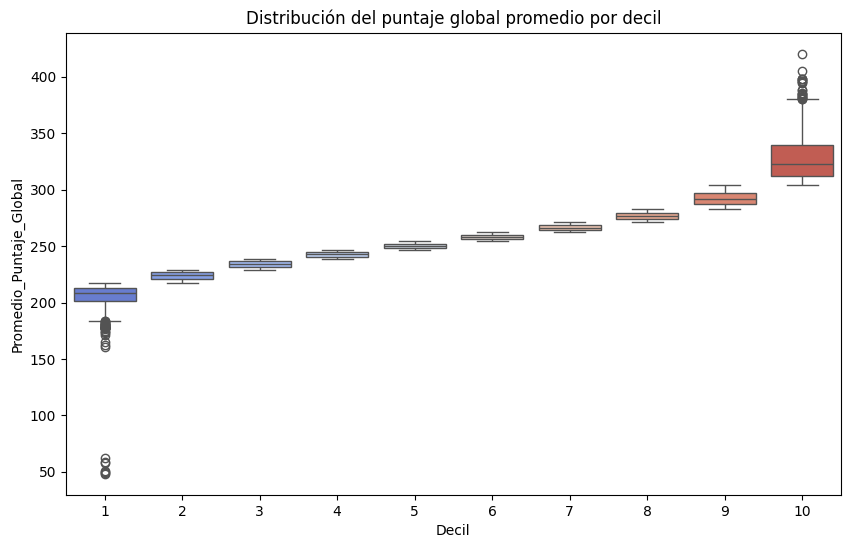

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(data=agrupado, x="Decil", y="Promedio_Puntaje_Global", palette="coolwarm")
plt.title("Distribución del puntaje global promedio por decil")
plt.show()


In [73]:
colegios_bajo = agrupado[agrupado["Decil"] == 1]
colegios_restantes = agrupado[agrupado["Decil"] != 1]


In [82]:
# Conteo porcentual
print(colegios_bajo["cole_naturaleza"].value_counts(normalize=True) * 100)
print(colegios_restantes["cole_naturaleza"].value_counts(normalize=True) * 100)


cole_naturaleza
OFICIAL       77.222222
NO OFICIAL    22.777778
Name: proportion, dtype: float64
cole_naturaleza
OFICIAL       61.686628
NO OFICIAL    38.313372
Name: proportion, dtype: float64


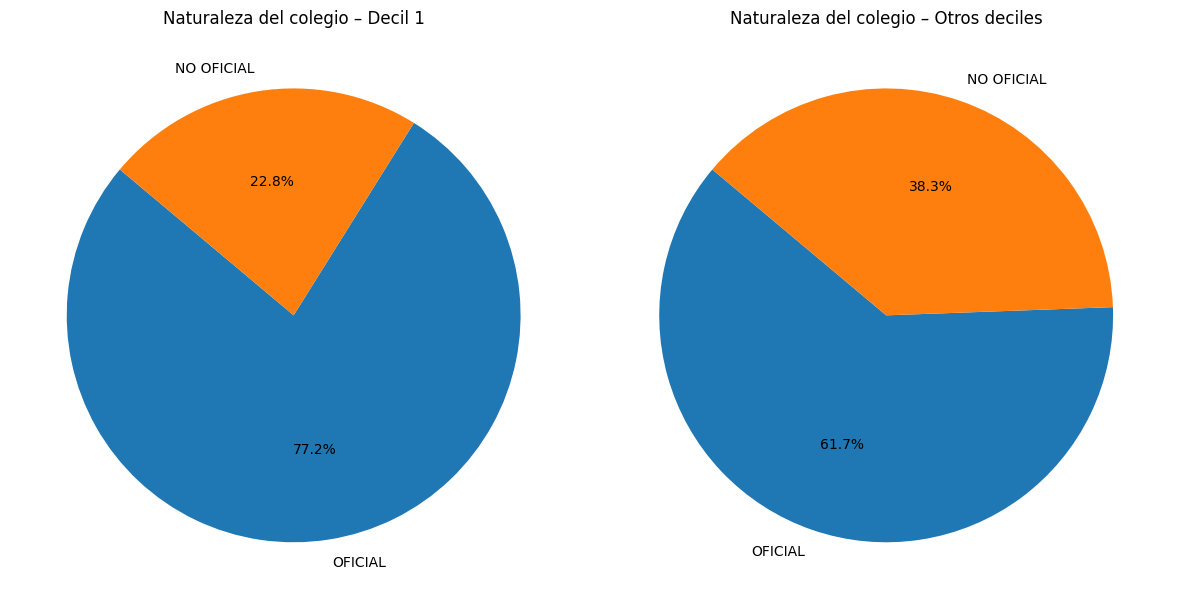

In [83]:
import matplotlib.pyplot as plt

# Conteo porcentual
naturaleza_bajo = colegios_bajo["cole_naturaleza"].value_counts(normalize=True) * 100
naturaleza_otros = colegios_restantes["cole_naturaleza"].value_counts(normalize=True) * 100

# Crear dos gráficos de pastel
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Decil 1
axes[0].pie(naturaleza_bajo, labels=naturaleza_bajo.index, autopct='%1.1f%%', startangle=140)
axes[0].set_title("Naturaleza del colegio – Decil 1")

# Restantes
axes[1].pie(naturaleza_otros, labels=naturaleza_otros.index, autopct='%1.1f%%', startangle=140)
axes[1].set_title("Naturaleza del colegio – Otros deciles")

plt.tight_layout()
plt.show()


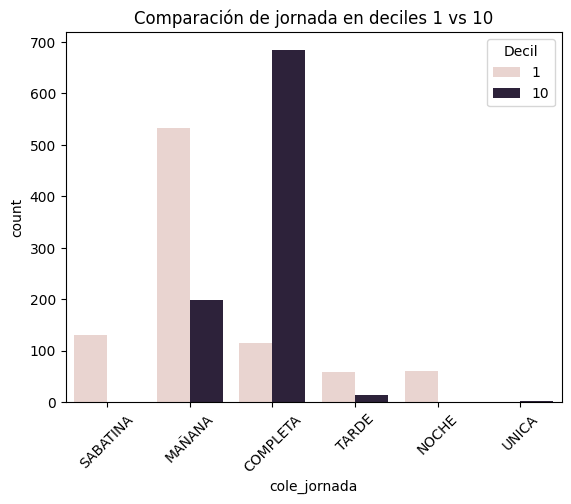

In [75]:
sns.countplot(data=agrupado[agrupado["Decil"].isin([1, 10])], x="cole_jornada", hue="Decil")
plt.title("Comparación de jornada en deciles 1 vs 10")
plt.xticks(rotation=45)
plt.show()


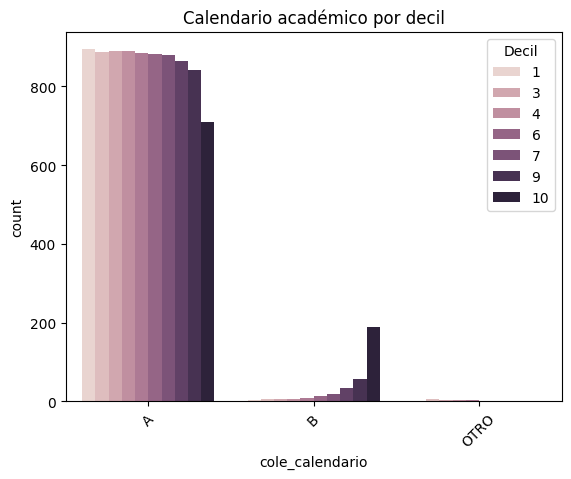

In [76]:
sns.countplot(data=agrupado, x="cole_calendario", hue="Decil")
plt.title("Calendario académico por decil")
plt.xticks(rotation=45)
plt.show()


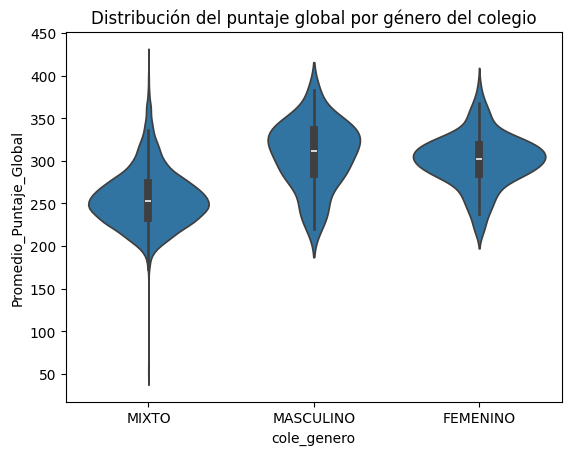

In [77]:
sns.violinplot(data=agrupado, x="cole_genero", y="Promedio_Puntaje_Global")
plt.title("Distribución del puntaje global por género del colegio")
plt.show()


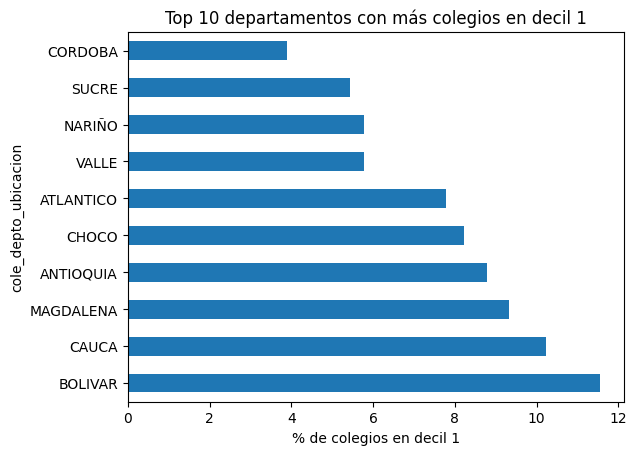

In [78]:
# Barplot con porcentaje por decil y departamento
deptos = agrupado[agrupado["Decil"] == 1]["cole_depto_ubicacion"].value_counts(normalize=True).head(10) * 100
deptos.plot(kind="barh", title="Top 10 departamentos con más colegios en decil 1")
plt.xlabel("% de colegios en decil 1")
plt.show()


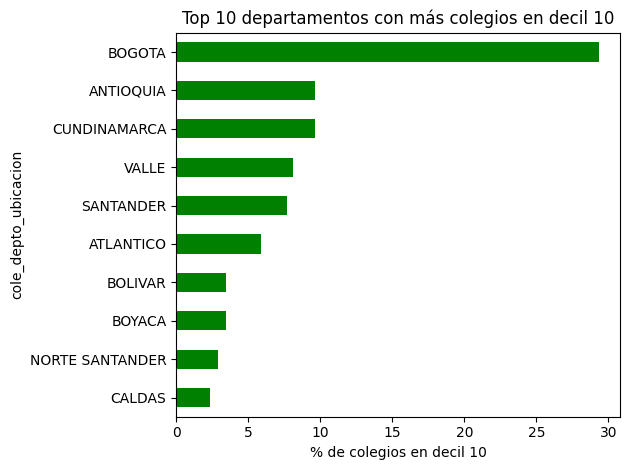

In [80]:
import matplotlib.pyplot as plt

# Barplot con porcentaje por decil y departamento (Decil 10)
deptos = agrupado[agrupado["Decil"] == 10]["cole_depto_ubicacion"]\
    .value_counts(normalize=True).head(10) * 100

deptos.plot(kind="barh", color="green", title="Top 10 departamentos con más colegios en decil 10")
plt.xlabel("% de colegios en decil 10")
plt.gca().invert_yaxis()  # Para que el más alto quede arriba
plt.tight_layout()
plt.show()


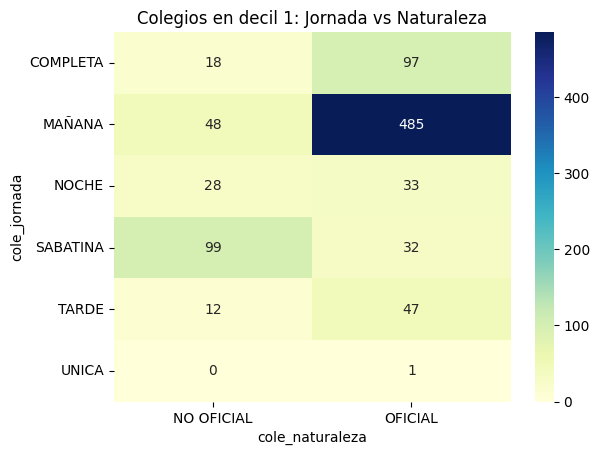

In [84]:
import seaborn as sns
heat_data = pd.crosstab(colegios_bajo["cole_jornada"], colegios_bajo["cole_naturaleza"])
sns.heatmap(heat_data, annot=True, cmap="YlGnBu", fmt="d")
plt.title("Colegios en decil 1: Jornada vs Naturaleza")
plt.show()


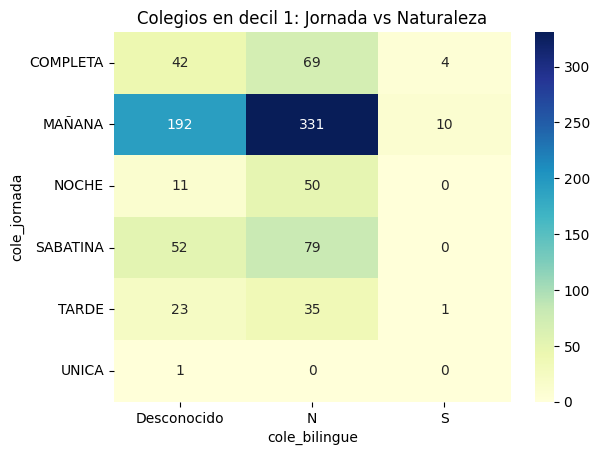

In [85]:
import seaborn as sns
heat_data = pd.crosstab(colegios_bajo["cole_jornada"], colegios_bajo["cole_bilingue"])
sns.heatmap(heat_data, annot=True, cmap="YlGnBu", fmt="d")
plt.title("Colegios en decil 1: Jornada vs Naturaleza")
plt.show()
